# Trabalho 01
- **Disciplina:** Jogos Dinâmicos
- **Aluno:** Iago Magalhães
- **Matricula:** 559973
- **Professor:** Wendley Silva
- **Descrição:** Nesta parte você deve escolher um conjunto de dados do Scikit-Learn, dentre os disponíveis no site [Ref. 4], entender (e explicar brevemente no relatório) quais são as suas características e usar pelo menos 4 (quatro) algoritmos de machine learning para fazer um comparativo de qual obteve o melhor resultado. Utilizar Tabelas e Gráficos para valiar o comparativo. Se preferir, pode-se optar por um conjunto de dados disponíveis no Kaggle [Ref. 5].


## Análise de dados

In [1]:
import pandas as pd

df = pd.read_csv('Orange Quality Data.csv')

In [2]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


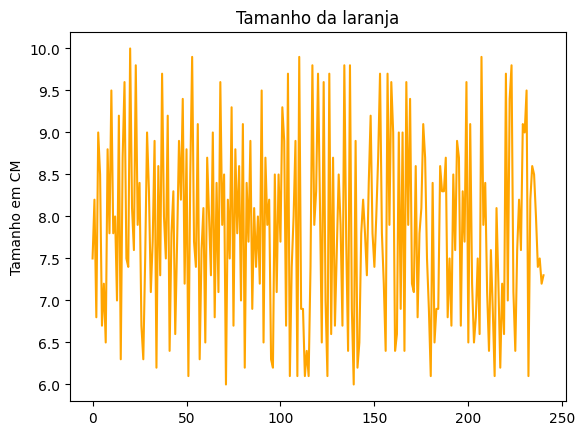

In [22]:
import matplotlib.pyplot as plt

plt.plot(df['Size (cm)'], label='Size (cm)', color='orange')
plt.title('Tamanho da laranja')
plt.ylabel('Tamanho em CM')

plt.show()

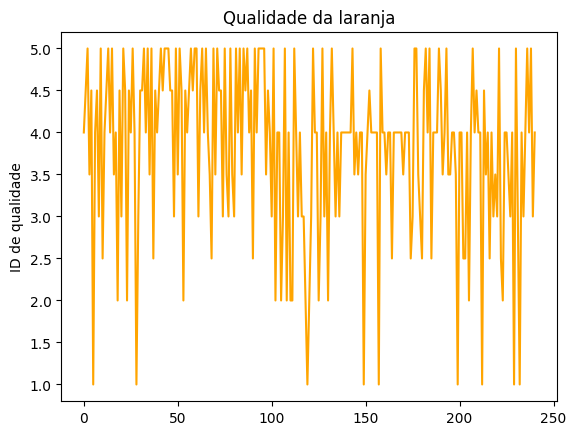

In [23]:
plt.plot(df['Quality (1-5)'], label='Quality', color='orange')
plt.title('Qualidade da laranja')
plt.ylabel('ID de qualidade')

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x255e82224a0>,
 'caps': [<matplotlib.lines.Line2D at 0x255e82229e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x255e8222230>],
 'medians': [<matplotlib.lines.Line2D at 0x255e8222f80>],
 'fliers': [<matplotlib.lines.Line2D at 0x255e8223250>],
 'means': []}

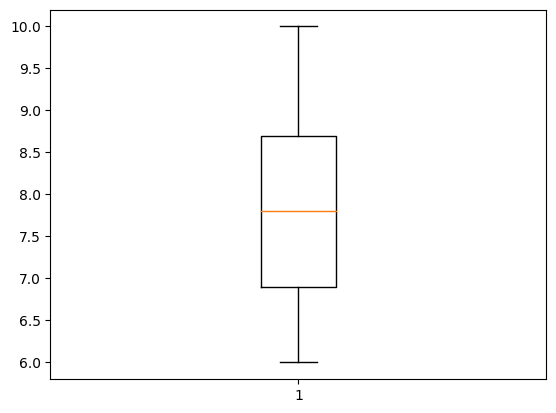

In [15]:
plt.boxplot(df['Size (cm)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x255e82892a0>,
 'caps': [<matplotlib.lines.Line2D at 0x255e8289840>,
 'boxes': [<matplotlib.lines.Line2D at 0x255e8288fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x255e8289de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x255e828a0b0>],
 'means': []}

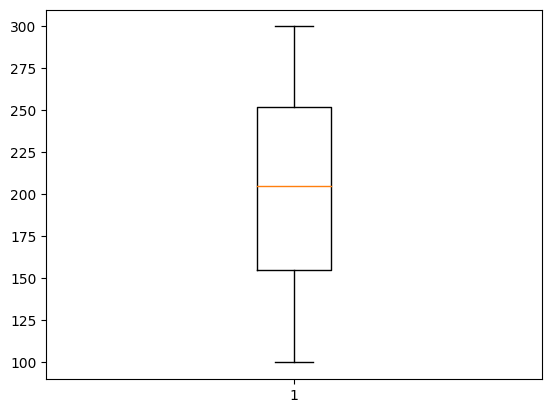

In [16]:
plt.boxplot(df[ 'Weight (g)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x255e83c39a0>,
 'caps': [<matplotlib.lines.Line2D at 0x255e83c3ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x255e83c36d0>],
 'medians': [<matplotlib.lines.Line2D at 0x255e83d84c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x255e83d8790>],
 'means': []}

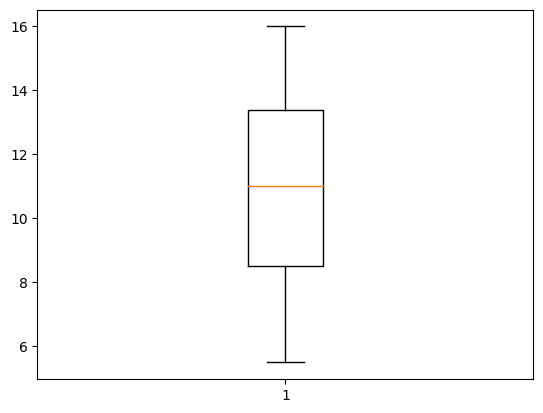

In [19]:
plt.boxplot(df['Brix (Sweetness)'])

## Seleção do algoritmo de Machine Learning

### Divisão dos dados em treino e teste

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
import numpy as np

df['Quality (1-5)'] = df['Quality (1-5)'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(df[['Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)',	'HarvestTime (days)', 'Ripeness (1-5)']], df[['Quality (1-5)']], test_size=0.3, random_state=42)

x_train = x_train.reset_index()
x_test = x_test.reset_index()
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print('Tamanho do conjunto de amostras para treino: ', len(x_train))
print('Tamanho do conjunto de classes para treino: ', len(y_train))
print('Tamanho do conjunto de amostras para teste: ', len(x_test))
print('Tamanho do conjunto de classes para teste: ', len(y_test))


Tamanho do conjunto de amostras para treino:  168
Tamanho do conjunto de classes para treino:  168
Tamanho do conjunto de amostras para teste:  73
Tamanho do conjunto de classes para teste:  73


In [53]:
x_test

,index,Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5)
0,24,190,10.5,3.10,2.5,12,4.0
1,6,160,9.0,3.50,3.5,9,4.0
2,222,291,6.3,3.90,4.0,17,2.0
3,208,197,13.1,3.20,2.0,14,2.0
4,236,194,10.9,3.60,5.0,13,1.0
...,...,...,...,...,...,...,...
68,192,192,12.4,3.20,1.0,25,4.0
69,104,202,14.3,4.09,5.0,15,5.0
70,109,120,14.7,3.97,5.0,10,5.0
71,234,251,11.5,3.80,5.0,23,3.0


In [54]:
y_test

,Quality (1-5)
0,4
1,4
2,2
3,4
4,5
...,...
68,4
69,4
70,4
71,3


### Algoritmo SVM

In [55]:
svm = svm.SVC(gamma=0.001, C=100.)
mtcSVM = cross_val_score(svm, x_train, y_train, cv=10, scoring='accuracy')

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [56]:
svm.fit(x_train, y_train)
predSVM = svm.predict(x_test)

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Algoritmo Naive Bayes

In [57]:
naiveBayes = GaussianNB()
mtcNaiveBayes = cross_val_score(naiveBayes, x_train, y_train, cv=10, scoring='accuracy')

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [58]:
naiveBayes.fit(x_train, y_train)
predNaiveBayes = naiveBayes.predict(x_test)

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Algoritmo KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
mtcKNN = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array wa

In [60]:
knn.fit(x_train, y_train)
predKNN = knn.predict(x_test)

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Algoritmo MLP

In [68]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, y_train)
mtcMLP = cross_val_score(mlp, x_train, y_train, cv=10, scoring='accuracy')

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array 

In [69]:
mlp.fit(x_train, y_train)
predMLP = mlp.predict(x_test)

c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\iagom\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## Análise dos resultados

### Matriz de confusão

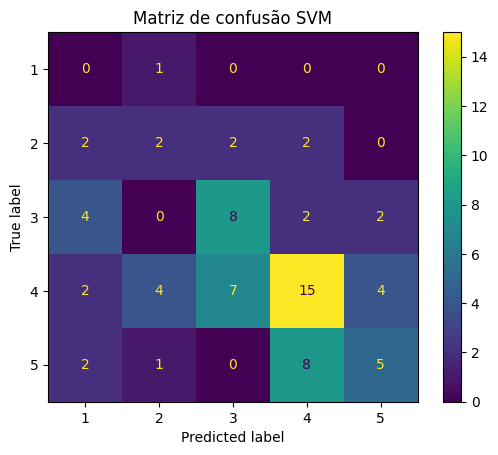

In [75]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predSVM), display_labels=svm.classes_).plot()
plt.grid(False)
plt.title('Matriz de confusão SVM')
plt.show()

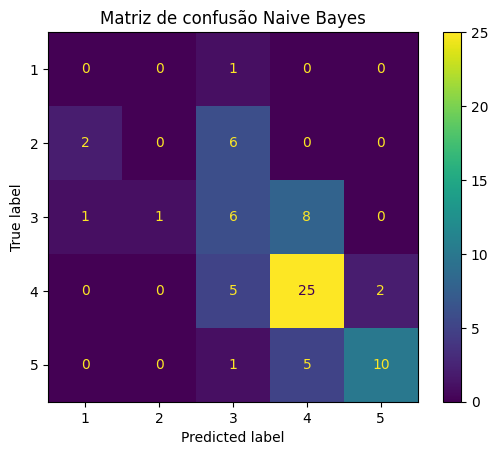

In [74]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predNaiveBayes), display_labels=naiveBayes.classes_).plot()
plt.grid(False)
plt.title('Matriz de confusão Naive Bayes')
plt.show()

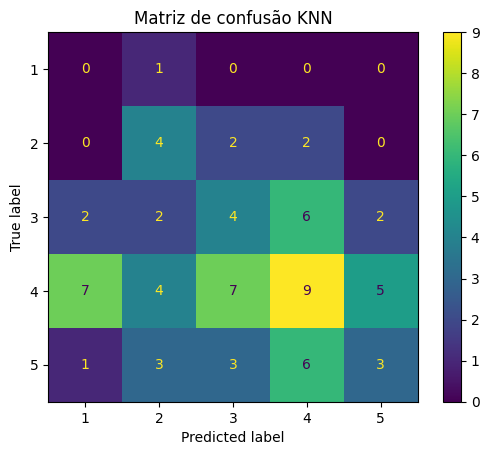

In [73]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predKNN), display_labels=knn.classes_).plot()
plt.grid(False)
plt.title('Matriz de confusão KNN')
plt.show()

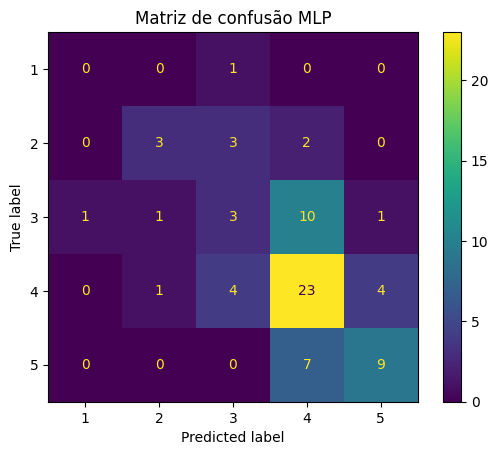

In [72]:
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test, predMLP), display_labels=mlp.classes_).plot()
plt.grid(False)
plt.title('Matriz de confusão MLP')
plt.show()

### Métricas de avaliação

In [77]:
accSVM = round(metrics.accuracy_score(y_test, predSVM), 2)
accNaiveBayes = round(metrics.accuracy_score(y_test, predNaiveBayes), 2)
accKNN = round(metrics.accuracy_score(y_test, predKNN), 2)
accMLP = round(metrics.accuracy_score(y_test, predMLP), 2)

recallSVM = round(metrics.recall_score(y_test, predSVM, average='macro'), 2)
recallNaiveBayes = round(metrics.recall_score(y_test, predNaiveBayes, average='macro'), 2)
recallKNN = round(metrics.recall_score(y_test, predKNN, average='macro'), 2)
recallMLP = round(metrics.recall_score(y_test, predMLP, average='macro'), 2)

f1scoreSVM = round(metrics.f1_score(y_test, predSVM, average='macro'), 2)
f1scoreNaiveBayes = round(metrics.f1_score(y_test, predNaiveBayes, average='macro'), 2)
f1scoreKNN = round(metrics.f1_score(y_test, predKNN, average='macro'), 2)
f1scoreMLP = round(metrics.f1_score(y_test, predMLP, average='macro'), 2)

precisionSVM = round(metrics.precision_score(y_test, predSVM, average='macro'), 2)
precisionNaiveBayes = round(metrics.precision_score(y_test, predNaiveBayes, average='macro'), 2)
precisionKNN = round(metrics.precision_score(y_test, predKNN, average='macro'), 2)
precisionMLP = round(metrics.precision_score(y_test, predMLP, average='macro'), 2)

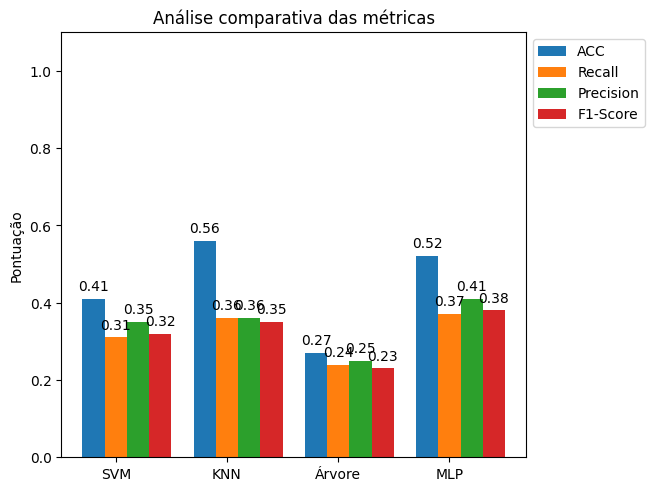

In [78]:
import matplotlib.pyplot as plt
import numpy as np

algoritms = ("SVM", "KNN", "Árvore", "MLP")
mtc = {
    'ACC': (accSVM, accNaiveBayes, accKNN, accMLP),
    'Recall': (recallSVM, recallNaiveBayes, recallKNN, recallMLP),
    'Precision':(precisionSVM, precisionNaiveBayes, precisionKNN, precisionMLP),
    'F1-Score': (f1scoreSVM, f1scoreNaiveBayes, f1scoreKNN, f1scoreMLP),
}

x = np.arange(len(algoritms))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

for attribute, measurement in mtc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Pontuação')
ax.set_title('Análise comparativa das métricas')
ax.set_xticks(x + width, algoritms)
ax.legend(bbox_to_anchor=(1.27, 1), loc='upper right')
ax.set_ylim(0, 1.1)

plt.show()

[Text(0, 0, '0.41'),
 Text(0, 0, '0.56'),
 Text(0, 0, '0.27'),
 Text(0, 0, '0.52')]

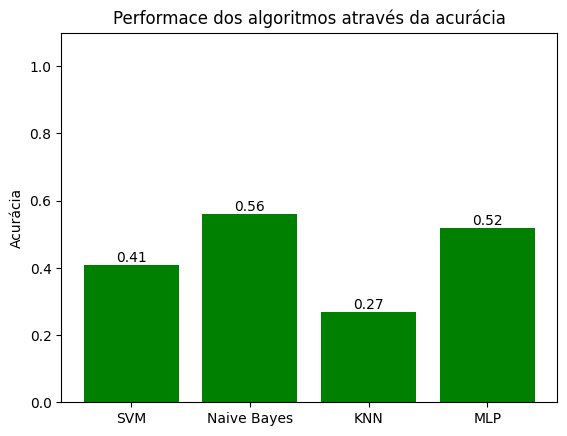

In [79]:
algoritmos = ['SVM', 'Naive Bayes', 'KNN', 'MLP']
acc = [accSVM, accNaiveBayes, accKNN, accMLP]

fig, ax = plt.subplots()
bar_container = ax.bar(algoritmos, acc, color='green')
ax.set(ylabel='Acurácia', title='Performace dos algoritmos através da acurácia', ylim=(0, 1.1))
ax.bar_label(bar_container)

### Análise de acurácia com validação cruzada

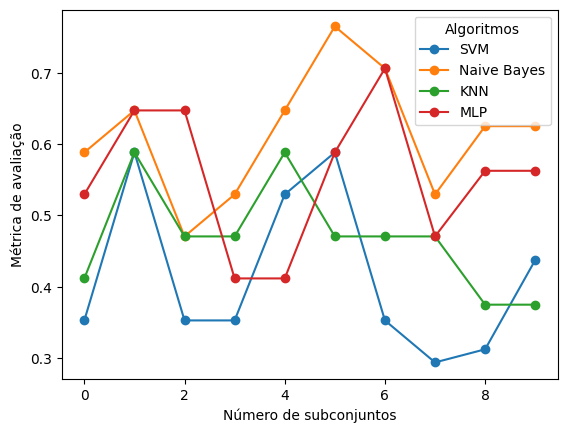

In [80]:
# fig, ax = plt.subplots()

plt.plot(mtcSVM, marker = 'o', label='SVM')
plt.plot(mtcNaiveBayes, marker = 'o', label='Naive Bayes')
plt.plot(mtcKNN, marker = 'o', label='KNN')
plt.plot(mtcMLP, marker = 'o', label='MLP')

plt.legend(bbox_to_anchor=(1, 1), title='Algoritmos')
plt.xlabel('Número de subconjuntos')
plt.ylabel('Métrica de avaliação')

plt.show()

## Referências
- [An introduction to machine learning with scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
- [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
- [Multi-layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)
- [Orange Quality Data](https://www.kaggle.com/datasets/shruthiiiee/orange-quality)
